In [1]:
import theano
import theano.tensor as T
import numpy as np
import sys 

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5105)


In [3]:
from mnist import test_mlp
sys.setrecursionlimit(50000)

In [8]:
# Random Search of hyper parameters
random_state = np.random.RandomState(94457)
log_learning_rate = random_state.uniform(low=-1,high=-5,size=20).astype(np.float32)

learning_rate = 10 ** log_learning_rate

learning_rate_decay = random_state.uniform(low=0.994,high=0.999,size=20).astype(np.float32)
        
momentum = random_state.uniform(low=0.5,high=0.9,size=20).astype(np.float32)

bias_init = random_state.uniform(low=-10,high=-1,size=20).astype(np.float32)

activation = random_state.binomial(1,0.5,size=20).astype(np.int)

In [ ]:
highway_score = []
highway_error = []

test_score_high, last_train_error1, train_error_highway = test_mlp(learning_rate=learning_rate[2], 
                                   L1_reg=0.00, L2_reg=0.00, n_epochs=400, highway=True, bias_init = bias_init[2], 
                                   learning_rate_decay=learning_rate_decay[2], momentum=momentum[2], 
                                    batch_size=20, n_hidden=[50]*100, 
                                   n_hidden_layer=100, verbose=True, activation=activation[2])
    
highway_score.append(last_train_error1)
highway_error.append(train_error_highway)
    
print ("####################################################")
print("iter: %f type: 'highway' loss %f" %(i,last_train_error1))
print ("####################################################")

... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 0.198583  train loss 0.202655  learning_rate 0.092488
     epoch 1, minibatch 2500/2500, test error of best model 6.610000 %
epoch 2, minibatch 2500/2500, validation loss 0.159061  train loss 0.145365  learning_rate 0.091949
     epoch 2, minibatch 2500/2500, test error of best model 5.230000 %
epoch 3, minibatch 2500/2500, validation loss 0.144035  train loss 0.112629  learning_rate 0.091413
     epoch 3, minibatch 2500/2500, test error of best model 4.210000 %
epoch 4, minibatch 2500/2500, validation loss 0.133439  train loss 0.091802  learning_rate 0.090881
     epoch 4, minibatch 2500/2500, test error of best model 3.990000 %
epoch 5, minibatch 2500/2500, validation loss 0.129622  train loss 0.078091  learning_rate 0.090352
     epoch 5, minibatch 2500/2500, test error of best model 3.720000 %
epoch 6, minibatch 2500/2500, validation loss 0.127594  train loss 0.074103  learning_rate 0

The code for file __file__ ran for 1554.50m


In [12]:
# Random Search of hyper parameters
random_state = np.random.RandomState(1908)
log_learning_rate = random_state.uniform(low=-1,high=-5,size=10).astype(np.float32)

learning_rate = 10 ** log_learning_rate

learning_rate_decay = random_state.uniform(low=0.994,high=0.999,size=10).astype(np.float32)
        
momentum = random_state.uniform(low=0.5,high=0.9,size=10).astype(np.float32)

bias_init = random_state.uniform(low=-10,high=-1,size=10).astype(np.float32)

activation = random_state.binomial(1,0.5,size=10).astype(np.int)

In [13]:
test_score_plain, last_train_error, train_error_plain = test_mlp(learning_rate=learning_rate[8], 
                                   L1_reg=0.00, L2_reg=0.00, n_epochs=400, highway=False, bias_init = None, 
                                   learning_rate_decay=learning_rate_decay[8], momentum=momentum[8], 
                                    batch_size=20, n_hidden=[71]*100, 
                                   n_hidden_layer=100, verbose=True, activation=activation[8])

... loading data
... building the model
... training
epoch 1, minibatch 2500/2500, validation loss 2.005883  train loss 2.015558  learning_rate 0.000201
     epoch 1, minibatch 2500/2500, test error of best model 79.050000 %
epoch 2, minibatch 2500/2500, validation loss 1.666451  train loss 1.684008  learning_rate 0.000200
     epoch 2, minibatch 2500/2500, test error of best model 59.910000 %
epoch 3, minibatch 2500/2500, validation loss 1.171948  train loss 1.195441  learning_rate 0.000200
     epoch 3, minibatch 2500/2500, test error of best model 38.820000 %
epoch 4, minibatch 2500/2500, validation loss 1.629582  train loss 1.660678  learning_rate 0.000200
epoch 5, minibatch 2500/2500, validation loss 1.077390  train loss 1.112322  learning_rate 0.000199
     epoch 5, minibatch 2500/2500, test error of best model 42.810000 %
epoch 6, minibatch 2500/2500, validation loss 1.013089  train loss 1.051739  learning_rate 0.000199
     epoch 6, minibatch 2500/2500, test error of best model

The code for file __file__ ran for 530.15m


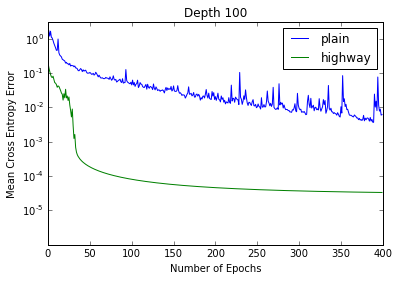

In [15]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
plt.ylim(-6,0.5)
plt.yticks([0,-1, -2, -3, -4, -5],
           ('$\mathregular{10^0}$','$\mathregular{10^{-1}}$','$\mathregular{10^{-2}}$','$\mathregular{10^{-3}}$',
            '$\mathregular{10^{-4}}$','$\mathregular{10^{-5}}$'))

plt.ylabel('Mean Cross Entropy Error')
plt.xlabel('Number of Epochs')
plt.xlim(0, 400)
plt.title('Depth 100')

plt.plot(np.log10(train_error_plain), label = 'plain')
plt.plot(np.log10(train_error_highway), label = 'highway')
plt.legend()
plt.show()